## Importing libs 
* pandas : to reading dataSet .
* numpy : to change pandasType to numpy(array , matrix) and use it by math operation .
* train_test_split : as its name to splitting train and test data .
* pyplot : to displaying plots
* KNeighborsClassifier : to fitting and traing function by data .


In [29]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

## Reading dataSet 

In [2]:
dataSet_addres = r"D:\Payam\UT\Machin Learning\MyCode\Classification\IrisProject\iris.csv"
dataset = pd.read_csv(dataSet_addres)
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


##### checking data

In [3]:
print(dataset.dtypes)
print(dataset['class'].value_counts())

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


## Pre-processing
* split x_data and y_data 
* split train and test data

In [45]:
X_data = dataset[['sepal-length' , 'sepal-width' , 'petal-length' , 'petal-width']]
Y_data = dataset[['class']]
print(Y_data)
X_trainset , X_testset , Y_trainset , Y_testset = train_test_split(X_data ,Y_data , test_size=0.2 ,random_state=4)
print("Train set: " , X_trainset.shape , Y_trainset.shape)
print("Test set: " , X_testset.shape , Y_testset.shape)


              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]
Train set:  (120, 4) (120, 1)
Test set:  (30, 4) (30, 1)


## Modelling 

In [46]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset , Y_trainset.values.ravel())
    yhat = neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(Y_testset , yhat )
    
print(mean_acc)
    

[0.93333333 0.93333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667]


## Displaying plot to see accuracy 

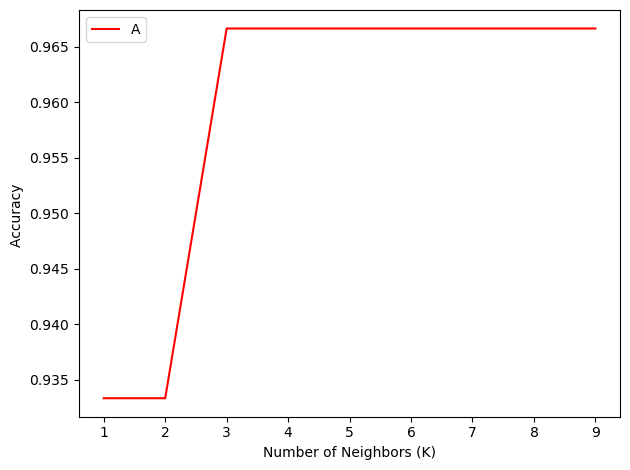

In [47]:
plt.plot(range(1,Ks) , mean_acc , color="red")

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
